<a href="https://colab.research.google.com/github/Kait3K/Haldane-model-numerical-calculation/blob/main/Haldane_Dispersion_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

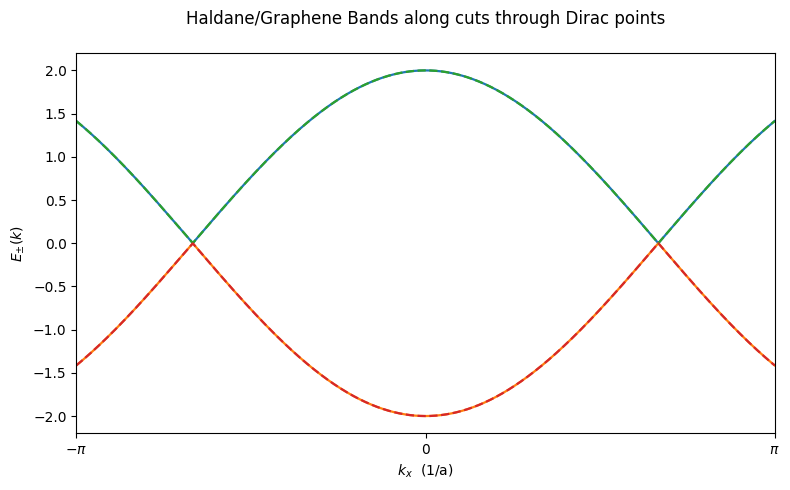

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t1  = 1.0
t2  = 0
phi = np.pi/3
M   = 0
a   = 1

n = 1200
kx = np.linspace(-np.pi/a, np.pi/a, n)
ky_K  =  +2*np.pi/(3*np.sqrt(3)*a)
ky_Kp =  -2*np.pi/(3*np.sqrt(3)*a)

d1 = np.array([ a/2,  np.sqrt(3)*a/2 ])
d2 = np.array([ a/2, -np.sqrt(3)*a/2 ])
d3 = np.array([-a  ,  0.0])
deltas = [d1, d2, d3]

b1 = d2 - d3
b2 = d3 - d1
b3 = d1 - d2
bs = [b1, b2, b3]

def bands(kx, ky):
    f = sum(np.exp(1j*(kx*dx + ky*dy)) for dx,dy in deltas)
    g = sum(np.cos(      kx*bx + ky*by ) for bx,by in bs)
    h = sum(np.sin(      kx*bx + ky*by ) for bx,by in bs)
    dx = -t1*np.real(f)
    dy =  t1*np.imag(f)
    dz = M - 2.0*t2*np.sin(phi)*h
    d0 = 2.0*t2*np.cos(phi)*g
    absd = np.sqrt(dx*dx + dy*dy + dz*dz)
    return d0+absd, d0-absd

Eplus_K,  Eminus_K  = np.array([bands(k, ky_K)  for k in kx]).T
Eplus_Kp, Eminus_Kp = np.array([bands(k, ky_Kp) for k in kx]).T

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(kx, Eplus_K,  lw=1.6, label=r"$k_y=+\frac{2\pi}{3\sqrt{3}a}$")
ax.plot(kx, Eminus_K, lw=1.6)
ax.plot(kx, Eplus_Kp,  lw=1.6, ls="--", label=r"$k_y=-\frac{2\pi}{3\sqrt{3}a}$")
ax.plot(kx, Eminus_Kp, lw=1.6, ls="--")

kxK = 2*np.pi/(3*a)
Epk, Emk = bands(kxK, ky_K)

ax.set_xlim(-np.pi/a, np.pi/a)
ax.set_xticks([-np.pi/a, 0.0, np.pi/a])
ax.set_xticklabels([r"$-\pi$", r"$0$", r"$\pi$"])
ax.set_xlabel(r"$k_x$  (1/a)")
ax.set_ylabel(r"$E_{\pm}(k)$")
ax.set_title("Haldane/Graphene Bands along cuts through Dirac points\n")
plt.tight_layout()
plt.show()
